<h1>Predicting the feasibility of using chatbots in solving sexual, reproductive & health problems.<h1>

<h3>1. Import Data & Python Packages<h3>

In [4175]:
#import packages and dataframe
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
plt.rc('font', size = 14)

import seaborn as sns
sns.set (style ='white') #white background style for seaborn plots
sns.set(style= 'whitegrid', color_codes =True)

<h4>2. Drop unwanted Rows and Columns<h4>

In [4176]:
#making data frame
df = pd.read_csv('dissertation.csv')

#class DataFrameimputer(TransformerMixin):
    #def fit(self, X, y=None):
        #self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        #return self

    #def transform(self, X, y=None):
        #return X.fillna(self.fill)
        


# Remove all columns between column index 0 to 17
def drop_rows_and_columns(dataframe: pd.DataFrame):
    df = dataframe.iloc[5:].reset_index(drop=True)
    df.index = df.index + 1
    columns_to_drop = [column for column in list(df.columns) if "_TEXT" in column]
    df = df.drop(columns=columns_to_drop+["IPAddress", "RecipientLastName", "RecipientLastName", "RecipientEmail", "ExternalReference", "StartDate", "EndDate", "Status", "Progress", "Duration (in seconds)", "Finished", "RecordedDate", "ResponseId", "RecipientFirstName", "LocationLatitude", "LocationLongitude", "DistributionChannel", "UserLanguage", "Q1"])
    return df


def split_social_media_field(dataframe: pd.DataFrame):
    social_media_column = dataframe['Q9'].str.split(',', n = 9, expand = True)
    column_names = ["Facebook", "Google", "Tiktok", "Whatsapp", "Snapchat", "Twitter", "Youtube", "Instagram","Linkedin"]
    for idx, item in enumerate(social_media_column.T.values.tolist()):
        dataframe[column_names[idx]] = item
    return dataframe


def split_conversation_field(dataframe: pd.DataFrame):
    conversation_field_column= dataframe['Q10'].str.split(',', n = 6, expand = True)
    column_names = ["Have Conversations", "Share Information", "Create Web Content", "Education", "Health Research", "Other"]
    for idx, item in enumerate (conversation_field_column.T.values.tolist()):
        dataframe[column_names[idx]] = item
    return dataframe

def split_use_of_chatbot(dataframe: pd.DataFrame):
    chatbot_use_column = dataframe['Q13'].str.split(',', n = 6, expand = True)
    column_names = ["Productivity Purpose", "Marketing", "Customer Service", "Banking", "Booking", "Other"]
    for idx, item in enumerate (chatbot_use_column.T.values.tolist()):
        dataframe[column_names[idx]] = item
    return dataframe

def split_chatbot_interacted_with_field(dataframe: pd.DataFrame):
    chatbot_interacted_with_column = dataframe['Q14'].str.split(',', n = 5, expand = True)
    column_names = ["Google Assist", "Siri", "Alexa", "Cortana", "Other"]
    for idx, item in enumerate (chatbot_interacted_with_column.T.values.tolist()):
        dataframe[column_names[idx]] = item
    return dataframe


dataframe = drop_rows_and_columns(df)
dataframe = split_social_media_field(dataframe)
dataframe = split_conversation_field(dataframe)
dataframe = split_use_of_chatbot(dataframe)
dataframe = split_chatbot_interacted_with_field(dataframe)


#imputer = KNNImputer(n_neighbors=5)
#dataframe = DataFrameimputer().fit_transform(dataframe)

# Encode X and y axis for model training and testing
#label_enc = LabelEncoder()
#label_enc_x = LabelEncoder()
#label_enc.fit(list(dataframe['Q20']))

#y = label_enc.transform(list(dataframe['Q20']))
#X = dataframe.drop(['Q20'], axis=1)

# Encode the whole dataframe
#X = X.apply(label_enc_x.fit_transform)

# split training and testing data. 30% of Test data size used
#X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)

#instantiating and fitting the model
#dataframe_model = DecisionTreeClassifier(random_state= 10)
#dataframe_model.fit(X_train, y_train)

# predicting the data and finding the model accuracy
#predicted = dataframe_model.predict(X_test)
#accuracy = metrics.accuracy_score(y_test, predicted)


#print(accuracy*100)

<h5>Drop delimited columns<h5>

In [4177]:
#Drop delimited columns Q9, Q10, Q13, Q14 from the dataset
dataframe = dataframe.drop(['Q9', 'Q10', 'Q13', 'Q14'], axis = 1)
#print(dataframe)
dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,zimbabwean,UK,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,None,Productivity purpose,None,None,None,None,Alexa,None,None,None
2,24,NaN,NaN,NaN,Working full-time,Living with a partner,Vocational or Similar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,zimbabwean,UK,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,None,Other (please specify),None,None,None,None,Cortana,None,None,None


<h5>Capitalization of columns<h5>

In [4178]:
#capitalize first letter in column Q3 (Nationality)
dataframe ['Q3'] = dataframe ['Q3'].str.capitalize()
dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,UK,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,None,Productivity purpose,None,None,None,None,Alexa,None,None,None
2,24,NaN,NaN,NaN,Working full-time,Living with a partner,Vocational or Similar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,Zimbabwean,UK,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,None,Other (please specify),None,None,None,None,Cortana,None,None,None


In [4179]:
#capitalize first letter in column Q4 (Current City)
dataframe ['Q4'] = dataframe ['Q4'].str.capitalize()
dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,None,Productivity purpose,None,None,None,None,Alexa,None,None,None
2,24,NaN,NaN,NaN,Working full-time,Living with a partner,Vocational or Similar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,None,Other (please specify),None,None,None,None,Cortana,None,None,None


<h3>2. Data Exploration<h3>

In [4180]:
dataframe.shape

(140, 40)

In [4181]:
dataframe.describe

<bound method NDFrame.describe of       Q2           Q3             Q4                        Q5  \
1     28   Zimbabwean             Uk                    Female   
2     24          NaN            NaN                       NaN   
3    NaN          NaN            NaN                       NaN   
4     23   Zimbabwean             Uk                    Female   
5     29          NaN            NaN                       NaN   
..   ...          ...            ...                       ...   
136   22  Zimbabwean        Zimbabwe                      Male   
137    3     Albanian           Hell  Non-binary/ third gender   
138   30  Zimbabwean   United states                      Male   
139   36  Zimbabwean    South africa                    Female   
140   59      British        England                    Female   

                                  Q6                     Q7  \
1                            Student                Widowed   
2                  Working full-time  Living wi

In [4182]:
#iterating the columns
for col in dataframe.columns:
    print(col)

Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q11
Q12
Q15
Q16
Q21
Q17
Q18
Q19
Q20
Facebook
Google
Tiktok
Whatsapp
Snapchat
Twitter
Youtube
Instagram
Linkedin
Have Conversations
Share Information
Create Web Content
Education
Health Research
Other
Productivity Purpose
Marketing
Customer Service
Banking
Booking
Google Assist
Siri
Alexa
Cortana


In [4183]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 1 to 140
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Q2                    138 non-null    object
 1   Q3                    134 non-null    object
 2   Q4                    134 non-null    object
 3   Q5                    134 non-null    object
 4   Q6                    136 non-null    object
 5   Q7                    136 non-null    object
 6   Q8                    136 non-null    object
 7   Q11                   135 non-null    object
 8   Q12                   134 non-null    object
 9   Q15                   130 non-null    object
 10  Q16                   130 non-null    object
 11  Q21                   83 non-null     object
 12  Q17                   89 non-null     object
 13  Q18                   85 non-null     object
 14  Q19                   85 non-null     object
 15  Q20                   85 non-null     ob

In [4184]:
print('The number of samples in dataframe is {}.'.format(dataframe.shape[0]))

The number of samples in dataframe is 140.


<h3>Data Quality and Assessing Missing values<h3>

In [4185]:
dataframe.isnull().sum()

Q2                        2
Q3                        6
Q4                        6
Q5                        6
Q6                        4
Q7                        4
Q8                        4
Q11                       5
Q12                       6
Q15                      10
Q16                      10
Q21                      57
Q17                      51
Q18                      55
Q19                      55
Q20                      55
Facebook                  6
Google                   74
Tiktok                   84
Whatsapp                 94
Snapchat                111
Twitter                 122
Youtube                 127
Instagram               131
Linkedin                138
Have Conversations        6
Share Information        70
Create Web Content       90
Education               107
Health Research         132
Other                   138
Productivity Purpose      7
Marketing               103
Customer Service        129
Banking                 137
Booking             

Text(0, 0.5, 'values')

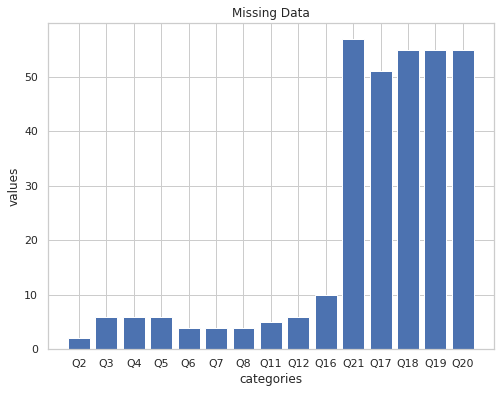

In [4186]:

missing_Q2 = dataframe.isnull().sum()['Q2']
missing_Q3 = dataframe.isnull().sum()['Q3']
missing_Q4 = dataframe.isnull().sum()['Q4']
missing_Q5 = dataframe.isnull().sum()['Q5']
missing_Q6 = dataframe.isnull().sum()['Q6']
missing_Q7 = dataframe.isnull().sum()['Q7']
missing_Q8 = dataframe.isnull().sum()['Q8']
missing_Q16 = dataframe.isnull().sum()['Q16']
missing_Q11 = dataframe.isnull().sum()['Q11']
missing_Q12 = dataframe.isnull().sum()['Q12']
missing_Q21 = dataframe.isnull().sum()['Q21']
missing_Q17 = dataframe.isnull().sum()['Q17']
missing_Q18 = dataframe.isnull().sum()['Q18']
missing_Q19 = dataframe.isnull().sum()['Q19']
missing_Q20 = dataframe.isnull().sum()['Q20']

Y1 = [missing_Q2, missing_Q3, missing_Q4, missing_Q5, missing_Q6, missing_Q7, missing_Q8,missing_Q11, missing_Q12, missing_Q16, missing_Q21, missing_Q17, missing_Q18, missing_Q19, missing_Q20]
X1 = ['Q2', 'Q3','Q4','Q5','Q6','Q7','Q8','Q11','Q12','Q16','Q21', 'Q17', 'Q18', 'Q19', 'Q20']
fig, ax = plt.subplots()
ax.bar(X1, Y1)

plt.title('Missing Data')
plt.xlabel('categories')
plt.ylabel('values')


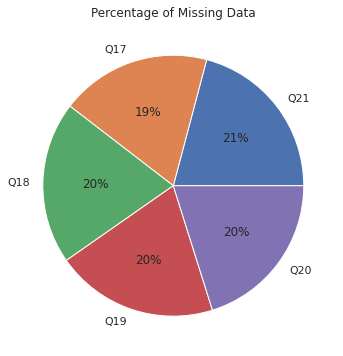

In [4187]:
Y1 = [missing_Q21, missing_Q17, missing_Q18, missing_Q19, missing_Q20]
labels = ['Q21', 'Q17', 'Q18', 'Q19', 'Q20']

fig, ax = plt.subplots()
ax.pie(Y1, labels = labels, autopct = '%.0f%%')
ax.set_title('Percentage of Missing Data')
plt.show()

<h2>Data visualization<h2>

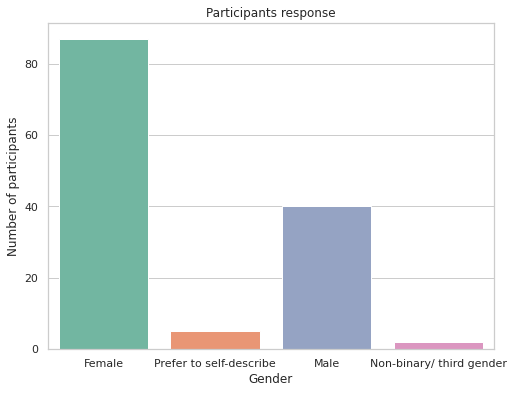

In [4188]:
# Display gender of participants 
gender = dataframe['Q5'].value_counts()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

sns.countplot(x='Q5', data=dataframe, palette='Set2')
plt.xlabel ('Gender')
plt.ylabel ('Number of participants')
plt.title ('Participants response')
plt.show()


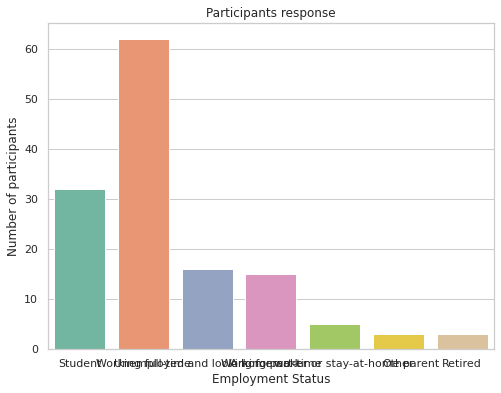

In [4189]:
# Display gender of participants 
gender = dataframe['Q6'].value_counts()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



sns.countplot(x='Q6', data=dataframe, palette='Set2')
plt.xlabel ('Employment Status')
plt.ylabel ('Number of participants')
plt.title ('Participants response')
plt.show()


In [4190]:
import dexplot as dxp

#dataframe['Q5'].value_counts()

gender = dataframe['Q5']
count_value= dataframe['Q5'].value_counts()

gender
count_value

#dxp.bar (x = gender, y = count_value, data=dataframe, aggfunc='median')


Female                      87
Male                        40
Prefer to self-describe      5
Non-binary/ third gender     2
Name: Q5, dtype: int64

<h4>Calculating Mean, Median and Mode<h4>

In [4191]:
#isolate 1 column
#Age = df['Q2']

#Age
#slit all the values that are strings and all the values that are not strings 
#dataframe['Q2'] = pd.to_numeric(dataframe['Q2'], errors = 'coerce').astype('Int64')
#dataframe['Q2'].dtypes

#dataframe.head(5)


In [4192]:
print('Missing age values is:')
dataframe.isnull().sum()['Q2']

Missing age values is:


2

<h3>Calculating the mean, median & mode of Age variable<h3>

In [4193]:
import re

In [4194]:
class DataFrameimputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
        
imputer = KNNImputer(n_neighbors=5)

dataframe = DataFrameimputer().fit_transform(dataframe)

dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana


In [4195]:
#isolate 1 column
#Age = df['Q2']

#Age
#slit all the values that are strings and all the values that are not strings 
dataframe['Q2'] = pd.to_numeric(dataframe['Q2'], errors = 'coerce').astype('Int64')
dataframe['Q2'].dtypes

dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana


In [4196]:
#import statistics module to calculate mean, median, mode
import statistics 

print ("The mean of 'Age' variable is:")
statistics.mean(dataframe['Q2'].dropna().to_list())

The mean of 'Age' variable is:


31

In [4197]:
print ("The mode of 'Age'variable is:")
statistics.mode(dataframe['Q2'].dropna().to_list())

The mode of 'Age'variable is:


29

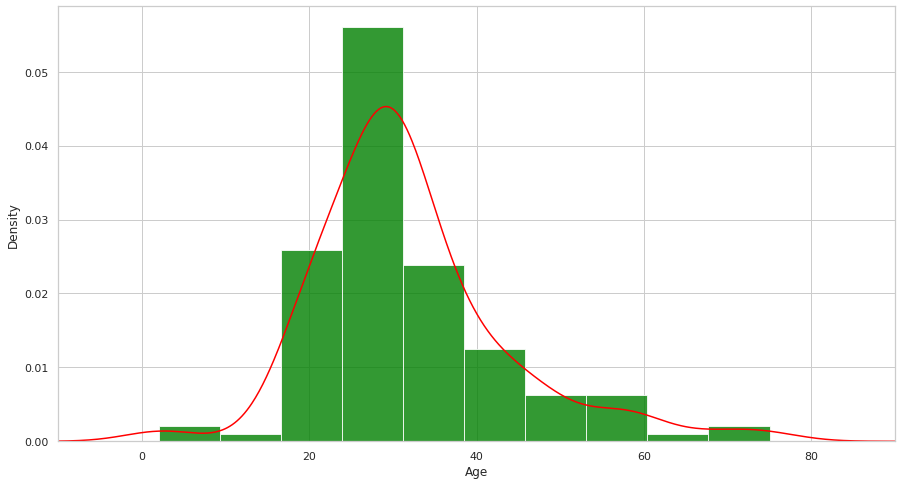

In [4198]:
plt.figure(figsize=(15,8))
ax = dataframe["Q2"].hist(bins=10, density=True, stacked=True, color='green', alpha=0.8)
dataframe["Q2"].plot(kind='density',color='red')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

<h4>Imputing Missing Values<h4>

In [4199]:

print(round (dataframe.isnull().sum().sort_values(ascending=False)/len(dataframe)*100,1))

Q2                      5.7
Q3                      0.0
Youtube                 0.0
Instagram               0.0
Linkedin                0.0
Have Conversations      0.0
Share Information       0.0
Create Web Content      0.0
Education               0.0
Health Research         0.0
Other                   0.0
Productivity Purpose    0.0
Marketing               0.0
Customer Service        0.0
Banking                 0.0
Booking                 0.0
Google Assist           0.0
Siri                    0.0
Alexa                   0.0
Twitter                 0.0
Snapchat                0.0
Whatsapp                0.0
Q15                     0.0
Q4                      0.0
Q5                      0.0
Q6                      0.0
Q7                      0.0
Q8                      0.0
Q11                     0.0
Q12                     0.0
Q16                     0.0
Tiktok                  0.0
Q21                     0.0
Q17                     0.0
Q18                     0.0
Q19                 

In [4200]:
dataframe['Q2'] = pd.to_numeric(dataframe['Q2'], errors = 'coerce').astype('Int64')
dataframe['Q2'].dtypes
dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana


In [4201]:
dataframe.isnull().sum()['Q2']

8

In [4202]:
#Finding the mean of the column having NaN
mean_value = statistics.mean(dataframe['Q2'].dropna().to_list())

# Replace NaNs in column S2 with the
# mean of values in the same column
dataframe['Q2'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')

dataframe.head(4)

Updated Dataframe:


,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana


In [4203]:
dataframe['Q2'].dtype

Int64Dtype()

In [4204]:
class DataFrameimputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
        
imputer = KNNImputer(n_neighbors=5)

dataframe = DataFrameimputer().fit_transform(dataframe)

dataframe.head(5)


,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana
5,29,Zimbabwean,Zimbabwe,Female,Unemployed and looking for work,Never been married,"Graduate or professional degree (MA, MS, MBA, ...",4-5hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana


In [4205]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 1 to 140
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Q2                    140 non-null    Int64 
 1   Q3                    140 non-null    object
 2   Q4                    140 non-null    object
 3   Q5                    140 non-null    object
 4   Q6                    140 non-null    object
 5   Q7                    140 non-null    object
 6   Q8                    140 non-null    object
 7   Q11                   140 non-null    object
 8   Q12                   140 non-null    object
 9   Q15                   140 non-null    object
 10  Q16                   140 non-null    object
 11  Q21                   140 non-null    object
 12  Q17                   140 non-null    object
 13  Q18                   140 non-null    object
 14  Q19                   140 non-null    object
 15  Q20                   140 non-null    ob

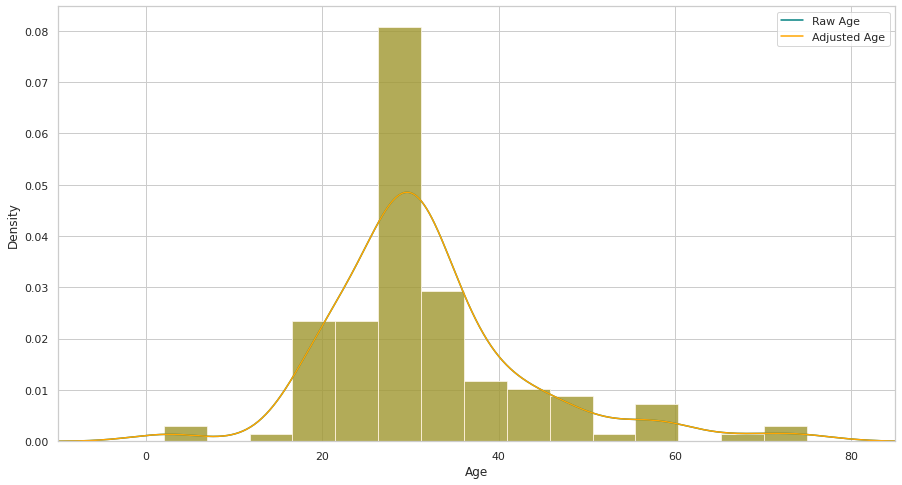

In [4206]:
plt.figure(figsize=(15,8))
ax = dataframe["Q2"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
dataframe["Q2"].plot(kind='density', color='teal')
ax = dataframe["Q2"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
dataframe["Q2"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

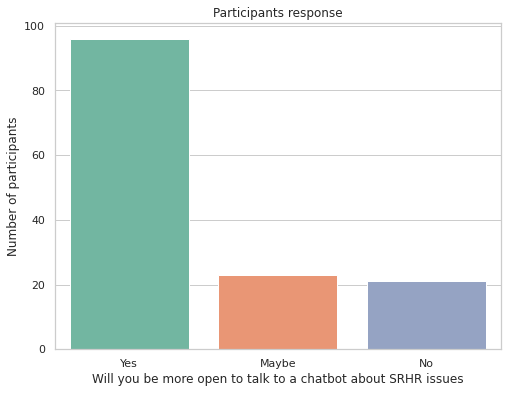

In [4207]:
#print('Number of participants who feel will be open to talk to a chatbot about SRHR isses ')
#print(dataframe['Q20'].value_counts())
sns.countplot(x='Q20', data=dataframe, palette='Set2')
plt.xlabel ('Will you be more open to talk to a chatbot about SRHR issues')
plt.ylabel ('Number of participants')
plt.title ('Participants response')
plt.show()


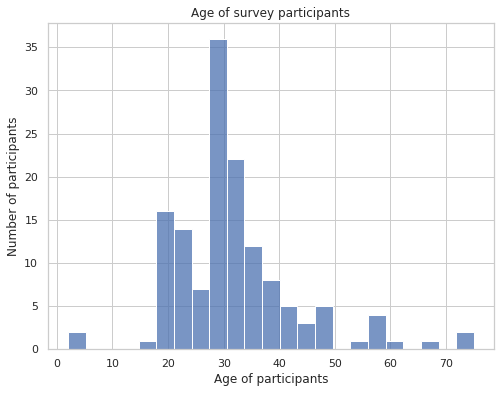

In [4208]:
#print('Age of participants ')
#print(dataframe['Q2'].value_counts())
sns.histplot(x='Q2', data=dataframe, palette='Set2')
plt.xlabel ('Age of participants')
plt.ylabel ('Number of participants')
plt.title ('Age of survey participants')
plt.show()

<h2>Preparing Data for Machine Learning<h2>

<h5>Encoding<h5>

In [4209]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# creating one hot encoder object 

label_enc = LabelEncoder()
#label_enc.fit(list(dataframe['Q20']))

#Assigning numerical values and storing it in another column called 'Responses'
dataframe['Q20'] = label_enc.fit_transform(dataframe ['Q20'])

#Display Dataframe
dataframe.head(4)

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,28,Zimbabwean,Uk,Female,Student,Widowed,University Bachelors Degree,7hrs +,Yes,Helpful,...,Other (please specify),Productivity purpose,Banking,Booking,Banking,Booking,Alexa,Siri,Alexa,Cortana
2,24,Zimbabwean,Zimbabwe,Female,Working full-time,Living with a partner,Vocational or Similar,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
3,29,Zimbabwean,Zimbabwe,Female,Working full-time,Never been married,University Bachelors Degree,2-3hrs,Yes,Helpful,...,Other (please specify),Customer service,Banking,Booking,Banking,Booking,Google Assist,Siri,Alexa,Cortana
4,23,Zimbabwean,Uk,Female,Working full-time,Married,Some University but no degree,7hrs +,Yes,Not helpful,...,Other (please specify),Other (please specify),Banking,Booking,Banking,Booking,Cortana,Siri,Alexa,Cortana


In [4210]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 1 to 140
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Q2                    140 non-null    Int64 
 1   Q3                    140 non-null    object
 2   Q4                    140 non-null    object
 3   Q5                    140 non-null    object
 4   Q6                    140 non-null    object
 5   Q7                    140 non-null    object
 6   Q8                    140 non-null    object
 7   Q11                   140 non-null    object
 8   Q12                   140 non-null    object
 9   Q15                   140 non-null    object
 10  Q16                   140 non-null    object
 11  Q21                   140 non-null    object
 12  Q17                   140 non-null    object
 13  Q18                   140 non-null    object
 14  Q19                   140 non-null    object
 15  Q20                   140 non-null    in

In [4211]:
#label encoding all columns for machine learning
dataframe = dataframe.apply(LabelEncoder().fit_transform)

dataframe.head(5)


,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q12,Q15,...,Other,Productivity Purpose,Marketing,Customer Service,Banking,Booking,Google Assist,Siri,Alexa,Cortana
1,13,27,18,0,3,4,6,4,1,0,...,0,5,0,1,0,0,0,3,0,0
2,9,28,28,0,5,1,7,1,1,0,...,0,2,0,1,0,0,2,3,0,0
3,14,28,28,0,5,3,6,1,1,0,...,0,2,0,1,0,0,2,3,0,0
4,8,27,18,0,5,2,5,4,1,1,...,0,4,0,1,0,0,1,3,0,0
5,14,28,28,0,4,3,1,2,1,0,...,0,2,0,1,0,0,2,3,0,0


<h2>Making Predictions<h2>

In [4212]:
#y = label_enc.transform(list(dataframe['Q20']))
#X = dataframe.drop(['Q20'], axis=1).values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#clf = DecisionTreeClassifier()

#clf = clf.fit(X_train, y_train)

##y_predict = clf.predict(X_test)

#y_predict

In [4213]:
print(dataframe.columns.tolist())

['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q11', 'Q12', 'Q15', 'Q16', 'Q21', 'Q17', 'Q18', 'Q19', 'Q20', 'Facebook', 'Google', 'Tiktok', 'Whatsapp', 'Snapchat', 'Twitter', 'Youtube', 'Instagram', 'Linkedin', 'Have Conversations', 'Share Information', 'Create Web Content', 'Education', 'Health Research', 'Other', 'Productivity Purpose', 'Marketing', 'Customer Service', 'Banking', 'Booking', 'Google Assist', 'Siri', 'Alexa', 'Cortana']


In [4214]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#cols = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q11', 'Q12', 'Q15', 'Q16', 'Q21', 'Q17', 'Q18', 'Q19', 'Q20', 'Facebook', 'Google', 'Tiktok', 'Whatsapp', 'Snapchat', 'Twitter', 'Youtube', 'Instagram', 'Linkedin', 'Have Conversations', 'Share Information', 'Create Web Content', 'Education', 'Health Research', 'Other', 'Productivity Purpose', 'Marketing', 'Customer Service', 'Banking', 'Booking', 'Google Assist', 'Siri', 'Alexa', 'Cortana']

#y = label_enc.transform(list(dataframe['Q20']))
#X = dataframe.drop(['Q20'], axis=1).values

# Build a logreg and compute the feature importances
#model = LogisticRegression()
# create the RFE model and select 8 attributes
#rfe = RFE(model, 35)
#rfe = rfe.fit(X, y)
# summarize the selection of the attributes
#print('Selected features: %s' % list(X.columns[rfe.support_]))


In [4215]:
#Separate independent and dependent variables
y = dataframe['Q20']
X = dataframe.drop(['Q20'], axis = 1)

In [4216]:
#import train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [4217]:
#create the train_test_split validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [4218]:
#distribution in training set
y_train.value_counts(normalize = True)

2    0.673469
0    0.204082
1    0.122449
Name: Q20, dtype: float64

In [4219]:
#distribution in testing set
y_test.value_counts(normalize = True)

2    0.714286
1    0.214286
0    0.071429
Name: Q20, dtype: float64

In [4220]:
#shape of training set
X_train.shape, y_train.shape

((98, 39), (98,))

In [4221]:
X_test.shape, y_test.shape

((42, 39), (42,))

In [4222]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [4223]:
#creating a decision tree function
dataframe_model = DecisionTreeClassifier(random_state= 10)

#fitting the model
dataframe_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=10)

In [4224]:
#checking the training score
dataframe_model.score(X_train, y_train)

1.0

In [4225]:
#checking the test score
dataframe_model.score(X_test, y_test)

0.7142857142857143

In [4226]:
#predictions on test set
dataframe_model.predict(X_test)

array([1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [4227]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

In [4228]:
dataframe_model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [4229]:
# Encode X and y axis for model training and testing
label_enc = LabelEncoder()
label_enc_x = LabelEncoder()
label_enc.fit(list(dataframe['Q20']))

y = label_enc.transform(list(dataframe['Q20']))
X = dataframe.drop(['Q20'], axis=1)

# Encode the whole dataframe
X = X.apply(label_enc_x.fit_transform)

# split training and testing data. 30% of Test data size used
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3)

#instantiating and fitting the model
dataframe_model = DecisionTreeClassifier(random_state= 10)
dataframe_model.fit(X_train, y_train)

# predicting the data and finding the model accuracy
predicted = dataframe_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predicted)
